### INFO 7390
#### Advances in Data Sciences and Architecture
#### Exam 1
#### Student Name: Zixuan Yu
#### Professor: Nik Bear Brown
#### Due: Sunday July 22, 2018

### Q1 (20 Points) The stock market is often modeled as a normal distribution; but is closer to a Weibull distribution. How does a normal distribution differ from a Weibull distribution? 
Plot a normal distribution with mean 700 and standard deviation 100.  What is the probability of a value being greater than 900?
Use a 2-parameter Weibull distribution to approximate a normal distribution (i.e.  find a shape parameter that has a “bell shape” and a scale parameter to is close the normal above.)


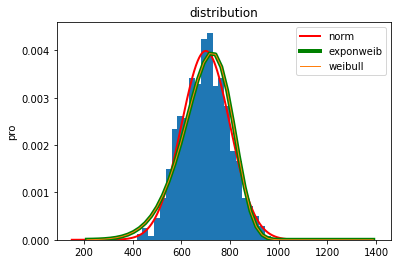

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
u, std = 700, 100
# normal distribution
domain =np.arange(150,1200,1)
plt.plot(domain, norm.pdf(domain, u, std), label='norm',color='r', linewidth=2)


#weibull distribution
data = np.random.normal(u, std, 1000)
params = stats.exponweib.fit(data, floc=0, f0=1)
shape = params[1]
scale = params[3]
# Histogram first
values,bins,hist = plt.hist(data,bins=50,range=(200,1400),normed=True)
center = (bins[:-1] + bins[1:]) / 2.
plt.plot(center,stats.exponweib.pdf(center,*params),lw=4,label='exponweib',color='green')

# Using Weibull function as a check
def weibull(u,shape,scale):
    '''Weibull distribution with shape parameter k and scale parameter A'''
    return (shape / scale) * (u / scale)**(shape-1) * np.exp(-(u/scale)**shape)

plt.plot(center,weibull(center,shape,scale),label='weibull',lw=1)
plt.legend()


plt.ylabel('pro')
plt.title('distribution')
plt.show()

# Normal

In [24]:
def normal(x,u,stu):
    return stats.norm.sf((x-u)/(stu))
print("normal: z>900",prob(900,700,100))

normal z>900 0.022750131948179195


In [20]:
from scipy.stats import exponweib

# WeiBull

In [25]:
print('weibull: (Z>900) =',stats.exponweib.sf(900,*params))

weibull: (Z>900) = 0.01783226624931744


### Q2 (20 Points) What is a hypothesis test? What is meant by the null hypothesis and alternative hypothesis?
#### 1.How does a z-test differ from a t-test?
#### 2.Create an example problem using a hypothesis test. It MUST use data that you used in assignment 1, 2 or 3.
#### 3.Show how to solve the problem with hand calculations.
#### 4.Show how to solve the problem with python code.


## 1.
#### 1. Z-test is a statistical hypothesis test that follows a normal distribution while T-test follows a Student’s T-distribution.
#### 2. A T-test is appropriate when you are handling small samples (n < 30) while a Z-test is appropriate when you are handling moderate to large samples (n > 30).
#### 3. T-test is more adaptable than Z-test since Z-test will often require certain conditions to be reliable. Additionally, T-test has many methods that will suit any need.
#### 4. T-tests are more commonly used than Z-tests.
#### 5. Z-tests are preferred than T-tests when standard deviations are known.



## 2
Question:
From 2013-2017 season, the record of the mean of team point is missing in NBA Statistic., but staff remember the record is more than 105.5. Now, in 2016-2017 season, the staff get the mean of team points in NBA is 105.42.  the significant level is 2.5%.

## 3


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('/Users/james/Desktop/IMG_9191.JPG')
im.show()

## 4

In [17]:
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/james/Desktop/assignment4.csv')

In [18]:
df1=df.TeamPoints

In [19]:
df1.describe()

count    3018.000000
mean      105.416501
std        11.472315
min        69.000000
25%        98.000000
50%       106.000000
75%       113.000000
max       137.000000
Name: TeamPoints, dtype: float64

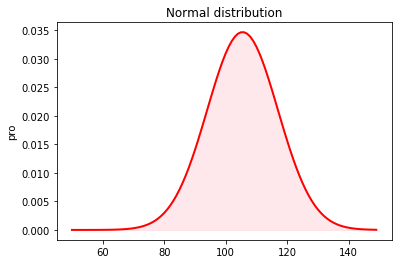

In [29]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from scipy import stats
domain =np.arange(50,150,1)
values =stats.norm(105.5, 11.5).pdf(domain)
plt.plot(domain, values, color='r', linewidth=2)
plt.fill_between(domain, 0, values, color='#ffb6c1',alpha=0.3)
plt.ylabel('pro')
plt.title('Normal distribution')
plt.show()

In [30]:
def prob(x,u,stu,n):
    return stats.norm.sf((x-u)/(stu/math.sqrt(n)))
print("prob",prob(105.2,105.5,11.5,3018))

prob 0.9240884506495575


### Q3 (20 Points) Write an equation for linear regression. Explain how the error is dependent on the independent variables?  What is the distribution of the error?

1. Linear regression predicts the response variable $y$ assuming it has a linear relationship with predictor variable(s) $x$ or $x_1, x_2, ,,, x_n$.

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

2. statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).

3. normality of the error distribution.

Read to following page on GLMs https://onlinecourses.science.psu.edu/stat504/node/216/
How does generalized linear model (GLM) relate to ordinary linear regression?
What is the relationship between the linear predictor(s) and the mean of the response distribution
function if one models ordinary linear regression as a GLM?
Linear regression assumes that the error of the dependent variable is normally distributed. What would
one do if it is not?

1. A generalized linear model is a flexible generalization of ordinary linear regression models which allows for the response variables (dependent) to have error distribution other than normal distribution

Use a GLM to create generalized linear model assuming the error of the dependent variable is normally
distributed on the same data that you used in the linear regression assignment. How does it compare to
the results in the linear regression assignment?
Relationship between the dependent and independent variables need not be of the simple linear form.
What would one do if it is not?
What is regularization? Why does one use it? Can it be used with a GLM?

Reference:

https://github.com/nikbearbrown/INFO_7390/blob/master/Week_4/NBB_Linear_Regression.ipynb

https://www.quora.com/What-is-the-difference-between-general-linear-models-and-generalized-linear-models

In [76]:
import statsmodels.api as sm

df.WINorLOSS = sm.add_constant(df.WINorLOSS)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(df.TeamPoints, df.WINorLOSS, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:             TeamPoints   No. Observations:                   3018
Model:                            GLM   Df Residuals:                       3017
Model Family:                   Gamma   Df Model:                              0
Link Function:          inverse_power   Scale:              0.011843632325361385
Method:                          IRLS   Log-Likelihood:                  -11669.
Date:                Sat, 21 Jul 2018   Deviance:                         36.660
Time:                        22:55:09   Pearson chi2:                       35.7
No. Iterations:                     4                                           
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WINorLOSS      0.0095   1.88e-05    504.797      0.000       0.009       0.010


## Q4 (20 Points) Consider the supervised learning algorithms support vector machines, random forests and multilayer perceptrons. What are hyper-parameters?
#### a hyperparameter is a parameter whose value is set before the learning process begins.
#### What are the hyper-parameters for the algorithms: 
#### 1) support vector machines, 
#### 2) random forests and 
#### 3) multilayer perceptrons? 
#### Using data, write python code to show the effect of hyper-parameters on each of these algorithms.
#### in SVM, with higher C(penalty) help to have better accuracy score.
#### in RF, with differnet n_estimators number, the result just show slightly different. 
#### in MLP, with learning rate 0.1 and 0.01 makes quite different result.
Reference:
https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)


####  Support Vector Machines

In [34]:
import pandas as pd
df=pd.read_csv('/Users/james/Desktop/assignment4.csv')
X = df.iloc[:,2:36].values
y=df['WINorLOSS'].values

In [35]:
df.head()

Home  WINorLOSS  TeamPoints  OpponentPoints  FieldGoals  \
0     1          1         113              96          45   
1     0          1          85              83          34   
2     0          0          96             122          35   
3     1          1         112              92          45   
4     1          1          97              85          37   

   FieldGoalsAttempted  FieldGoals.  X3PointShots  X3PointShotsAttempted  \
0                   95        0.474             9                     26   
1                   84        0.405             5                     20   
2                   87        0.402            10                     27   
3                   86        0.523             7                     16   
4                   85        0.435             9                     28   

   X3PointShots.       ...        Opp.FreeThrows  Opp.FreeThrowsAttempted  \
0          0.346       ...                    19                       24   
1          0.250       ...                     8                       18   
2          0.370       ...                    16                       20   
3          0.438       ...                    22                       29   
4          0.321       ...                    19                       22   

   Opp.FreeThrows.  Opp.OffRebounds  Opp.TotalRebounds  Opp.Assists  \
0            0.792               11                 41           20   
1            0.444                8                 41           22   
2            0.800               15                 46           27   
3            0.759               17                 41           12   
4            0.864               12                 41           12   

   Opp.Steals  Opp.Blocks  Opp.Turnovers  Opp.TotalFouls  
0          15           2             21              18  
1          13           5             17              19  
2           9          14             15              18  
3           7           8             17              19  
4           8           7             12              16  

[5 rows x 36 columns]

In [36]:
df.tail()

Home  WINorLOSS  TeamPoints  OpponentPoints  FieldGoals  \
3013     0          0         104             120          38   
3014     0          0         115             119          47   
3015     1          0          97             103          35   
3016     1          1         113             101          41   
3017     0          0          92             101          33   

      FieldGoalsAttempted  FieldGoals.  X3PointShots  X3PointShotsAttempted  \
3013                   72        0.528            12                     25   
3014                   94        0.500             9                     21   
3015                   87        0.402             9                     25   
3016                   83        0.494            15                     30   
3017                   95        0.347            10                     34   

      X3PointShots.       ...        Opp.FreeThrows  Opp.FreeThrowsAttempted  \
3013          0.480       ...                    18                       27   
3014          0.429       ...                    22                       28   
3015          0.360       ...                    16                       23   
3016          0.500       ...                    22                       27   
3017          0.294       ...                    22                       27   

      Opp.FreeThrows.  Opp.OffRebounds  Opp.TotalRebounds  Opp.Assists  \
3013            0.667               10                 46           26   
3014            0.786                5                 35           26   
3015            0.696                7                 50           24   
3016            0.815               13                 44           22   
3017            0.815                6                 42           20   

      Opp.Steals  Opp.Blocks  Opp.Turnovers  Opp.TotalFouls  
3013          13           3              9              14  
3014          10           3             16              14  
3015           5           5             18              22  
3016          14           1             16              18  
3017           6           7             16              27  

[5 rows x 36 columns]

In [37]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [70]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability = True, C = 0.1)#C = penalty
svc = svm.fit(X_train_std, y_train)
svc

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

from sklearn.model_selection import cross_val_score

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2414, 34) (2414,)
(604, 34) (604,)


In [72]:
display(X,y)

array([[113.,  96.,  45., ...,   2.,  21.,  18.],
       [ 85.,  83.,  34., ...,   5.,  17.,  19.],
       [ 96., 122.,  35., ...,  14.,  15.,  18.],
       ...,
       [ 97., 103.,  35., ...,   5.,  18.,  22.],
       [113., 101.,  41., ...,   1.,  16.,  18.],
       [ 92., 101.,  33., ...,   7.,  16.,  27.]])

array([1, 1, 0, ..., 0, 1, 0])

In [73]:
from sklearn import metrics

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc,X,y,cv=10).mean())
#SVM metrics
sm = svc.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 1.0
Accuracy score using SVM is 1.0


In [74]:
svm2 = SVC(kernel = 'linear', probability = True, C = 10)#C = penalty
svc2 = svm2.fit(X_train_std, y_train)

In [75]:
print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc2,X,y,cv=100).mean())
#SVM metrics
sm = svc2.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 1.0
Accuracy score using SVM is 1.0


#### Random Forests

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn import svm # SVM classifier
from sklearn.neural_network import MLPClassifier # MLP classifier
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings
warnings.filterwarnings('ignore')

In [14]:
X = df.iloc[:,2:36].values
y=df['WINorLOSS'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [16]:
RFm = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 5)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RFm,X,y,cv=10).mean())

# Random Forest metrics
sm = RFm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.9648894508161077
Accuracy score using Random Forest is 0.9668874172185431


In [15]:
RF2 = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 15,
                                max_features = 2)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RF2,X,y,cv=10).mean())

# Random Forest metrics
sm = RF2.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.9072216421659769
Accuracy score using Random Forest is 0.8956953642384106


#### Multilayer Perceptrons

In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=5, alpha=1e-4,
                        solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.01)
X = df.iloc[:,2:36].values
y = df['WINorLOSS'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)
clf = mlp.fit(X_train, y_train)

print("KfoldCrossVal mean score using MLP is %s" %cross_val_score(mlp,X,y,cv=10).mean())

y_pred = clf.predict(X_test)
print("Accuracy score using MLP is %s" %metrics.accuracy_score(y_test, y_pred))

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 4.12389682
Iteration 2, loss = 1.05239043
Iteration 3, loss = 0.68902849
Iteration 4, loss = 0.35845543
Iteration 5, loss = 0.22955358
Iteration 1, loss = 3.34168948
Iteration 2, loss = 0.73688005
Iteration 3, loss = 0.34045712
Iteration 4, loss = 0.22780483
Iteration 5, loss = 0.17058743
Iteration 1, loss = 3.07775248
Iteration 2, loss = 0.71629862
Iteration 3, loss = 0.29181507
Iteration 4, loss = 0.21190168
Iteration 5, loss = 0.17492357
Iteration 1, loss = 4.44290295
Iteration 2, loss = 1.11235815
Iteration 3, loss = 0.51322091
Iteration 4, loss = 0.33670088
Iteration 5, loss = 0.21329281
Iteration 1, loss = 3.75285112
Iteration 2, loss = 0.73239986
Iteration 3, loss = 0.34608294
Iteration 4, loss = 0.24036036
Iteration 5, loss = 0.16367386
Iteration 1, loss = 4.19085378
Iteration 2, loss = 1.02438230
Iteration 3, loss = 0.53332603
Iteration 4, loss = 0.31411137
Iteration 5, loss = 0.20859454
Iteration 1, loss = 3.75200504
Iteration 2, loss = 0.78807565
Iteratio

In [33]:
mlp2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=5, alpha=1e-4,
                    solver='X = df.iloc[:,2:36].values
y=df['WINorLOSS'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
X = df.iloc[:,2:36].values
y=df['WINorLOSS'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)
clf = mlp2.fit(X_train, y_train)

print("KfoldCrossVal mean score using MLP is %s" %cross_val_score(mlp2,X,y,cv=10).mean())

y_pred = clf.predict(X_test)
print("Accuracy score using MLP is %s" %metrics.accuracy_score(y_test, y_pred))

Iteration 1, loss = 8.53703986
Iteration 2, loss = 0.71297296
Iteration 3, loss = 0.69290358
Iteration 4, loss = 0.69323017
Iteration 5, loss = 0.69306691
Iteration 1, loss = 6.36810926
Iteration 2, loss = 0.69551410
Iteration 3, loss = 0.69318551
Iteration 4, loss = 0.69350524
Iteration 5, loss = 0.69321922
Iteration 1, loss = 5.94762902
Iteration 2, loss = 0.69859376
Iteration 3, loss = 0.69293280
Iteration 4, loss = 0.69341231
Iteration 5, loss = 0.69318114
Iteration 1, loss = 6.37171581
Iteration 2, loss = 0.71743406
Iteration 3, loss = 0.70039151
Iteration 4, loss = 0.69252365
Iteration 5, loss = 0.69395710
Iteration 1, loss = 6.13908043
Iteration 2, loss = 0.72029123
Iteration 3, loss = 0.70149374
Iteration 4, loss = 0.69260444
Iteration 5, loss = 0.69397346
Iteration 1, loss = 6.46462419
Iteration 2, loss = 0.76604721
Iteration 3, loss = 0.69574745
Iteration 4, loss = 0.69277065
Iteration 5, loss = 0.69352447
Iteration 1, loss = 5.92669775
Iteration 2, loss = 0.70237704
Iteratio

### Q5 (20 Points) What is the difference between bagging, boosting and stacking?
In python, show an example of bagging, boosting and stacking.

Do gradient-boosted trees, and random forests use bagging, boosting or stacking?
If so, how do gradient-boosted trees differ from random forests?

Create a meta-algorithm to implement a stacked ensemble super-learner in python. It must use at least
three base learners.
Did your super-learner help?

1. Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), decrease bias (boosting), or improve predictions (stacking).

2. Random Forest is a bagging algorithm, and gradient-boosted trees is boosting.
Gradient-boosted trees have a few hyperparams to tune, while random forest is practically tuning-free.

In 2005, Caruana et al. concluded that:
"With excellent performance on all eight metrics, calibrated boosted trees were the best learning algorithm overall. Random forests are close second."

3. Since the accuracy is already pretty high(0.94), the stacked ensemble super-learner might help but do not have much impact in this case.

Reference: 

https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

http://fastml.com/what-is-better-gradient-boosted-trees-or-random-forest/

In [62]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves

In [63]:
X = df.iloc[:,2:36].values
y=df['WINorLOSS'].values

## Bagging

In [64]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [66]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), label)    
    clf.fit(X, y)
   



Accuracy: 0.68 (+/- 0.05) Decision Tree
Accuracy: 0.88 (+/- 0.01) K-NN
Accuracy: 0.75 (+/- 0.10) Bagging Tree
Accuracy: 0.91 (+/- 0.03) Bagging K-NN


## Boosting

In [77]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 3, 5, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=5)', 'AdaBoost (n_est=10)']

In [78]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)   
    boosting.fit(X, y)
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), label) 


Accuracy: 0.68 (+/- 0.05) AdaBoost (n_est=1)
Accuracy: 0.68 (+/- 0.05) AdaBoost (n_est=3)
Accuracy: 0.68 (+/- 0.05) AdaBoost (n_est=5)
Accuracy: 0.68 (+/- 0.05) AdaBoost (n_est=10)


## Stacking

In [72]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

In [73]:
label = ['KNN', 'Random Forest', 'neural_network', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), label) 
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)

Accuracy: 0.88 (+/- 0.01) KNN
Accuracy: 0.92 (+/- 0.02) Random Forest
Accuracy: 0.99 (+/- 0.00) neural_network
Accuracy: 0.97 (+/- 0.01) Stacking Classifier
